In [1]:
%matplotlib inline
import numpy as np, scipy as sp, pandas as pd, seaborn as sns
from matplotlib import pyplot as plt

In [2]:
from ipywidgets import interact, fixed

# Goals for today
* Fourier series with other intervals
* splitting out even/odd terms
* lots of code you can steal
* Fourier transforms

# Dirichlet

In [3]:
def plotweird(left=1,right=2*np.pi):
    #right = 4*np.pi
    x = np.linspace(left,right,10000)
    plt.plot(x,np.sin(1/x))
    plt.xlim(0,right)
interact(plotweird,left=(0,1,0.01),right=(0,2*np.pi,0.01))

interactive(children=(FloatSlider(value=1.0, description='left', max=1.0, step=0.01), FloatSlider(value=6.283185307179586, description='right', max=6.283185307179586, step=0.01), Output()), _dom_classes=('widget-interact',))

<function __main__.plotweird>

# Fourier series, different period

Before, for our square wave, we figured out
$$a_n = \left\{\begin{matrix}
1 & n=0\\ 
0 & n\ne0
\end{matrix}\right.$$

$$b_n = \left\{\begin{matrix}
0 & \mathrm{even\ n}\\ 
\frac{2}{n\pi} & \mathrm{odd\ n} 
\end{matrix}\right.$$

so let's plot that again. First, how to separate even and odd terms?

In [4]:
print(list(range(0,10)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [5]:
range?

In [6]:
print(list(range(0,10,2)))

[0, 2, 4, 6, 8]


In [7]:
print(list(range(1,10,2)))

[1, 3, 5, 7, 9]


In [9]:
divmod(5,2)

(2, 1)

In [10]:
for n in range(10):
    div,mod = divmod(n,2)
    print(f'2 went into {n} {div} times with remainder {mod}')

2 went into 0 0 times with remainder 0
2 went into 1 0 times with remainder 1
2 went into 2 1 times with remainder 0
2 went into 3 1 times with remainder 1
2 went into 4 2 times with remainder 0
2 went into 5 2 times with remainder 1
2 went into 6 3 times with remainder 0
2 went into 7 3 times with remainder 1
2 went into 8 4 times with remainder 0
2 went into 9 4 times with remainder 1


In [12]:
for n in range(10):
    div,mod = divmod(n,2)
    if mod == 0:
        print(f'{n} was even')
    elif mod == 1:
        print(f'{n} was odd')
    else:
        print("something crazy just happened")

0 was even
1 was odd
2 was even
3 was odd
4 was even
5 was odd
6 was even
7 was odd
8 was even
9 was odd


In [13]:
def a(n):
    if n == 0:
        return 1
    else:
        return 0
def b(n):
    div,mod = divmod(n,2)
    if mod == 0: #even
        return 0
    else:
        return 2/(n*np.pi)

def plotseries(N=0):
    x = np.linspace(-10,10,10000)
    y = np.zeros_like(x)
    for n in range(N+1):
        if n == 0:
            y = y + 0.5*a(0)
        else:
            y = y + a(n)*np.cos(n*x)
            y = y + b(n)*np.sin(n*x)
    plt.plot(x,y)

In [14]:
interact(plotseries,N=(0,50))

interactive(children=(IntSlider(value=0, description='N', max=50), Output()), _dom_classes=('widget-interact',))

<function __main__.plotseries>

## And what if we instead define

$$f(x) = \frac{a_0}{2} + a_1\cos(\frac{\pi x}{l}) + ... + b_1\sin(\frac{\pi x}{l}) + ...$$

In [15]:
def plotseries(N=0,l=np.pi):
    x = np.linspace(-10,10,10000)
    y = np.zeros_like(x)
    for n in range(N+1):
        if n == 0:
            y = y + 0.5*a(0)
        else:
            y = y + a(n)*np.cos(n*np.pi*x/l)
            y = y + b(n)*np.sin(n*np.pi*x/l)
    plt.plot(x,y)
interact(plotseries,N=(0,50))

interactive(children=(IntSlider(value=0, description='N', max=50), FloatSlider(value=3.141592653589793, description='l', max=9.42477796076938, min=-3.141592653589793), Output()), _dom_classes=('widget-interact',))

<function __main__.plotseries>

# And now let's play with the awesome function we defined from Fourier Transforms!

In [16]:
from scipy import integrate
from numpy import pi, sin, cos, linspace

In [17]:
integrate.quad?

In [18]:
print (integrate.quad(lambda x: sin(x), 0, 2*pi))
print (integrate.quad(lambda x: sin(x), 0, pi))

(2.221501482512777e-16, 4.3998892617845996e-14)
(2.0, 2.220446049250313e-14)


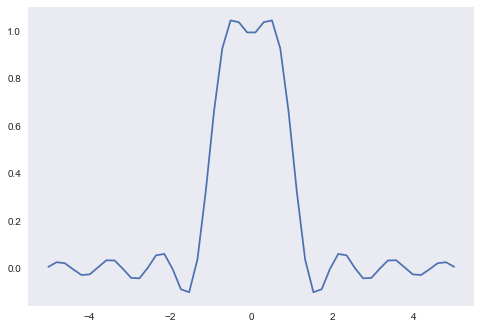

In [19]:
def f(x,toplim):
    def inner(alpha):
        return sin(alpha)*cos(alpha*x)/alpha
    return integrate.quad(inner, 0, toplim)[0]*2/pi
xs = linspace(-5,5,50) 
# This says to calculate the integral going from 0 to 5
# (should be from 0 to infinity, but that would take a while)
y = [f(x,5) for x in xs]
plt.plot(xs,y)
plt.grid()

So that's kind of convincing ... I mean, we can see that it looks a bit like 0 outside the range we want ... but not terribly. Does it help to add more points in the middle?

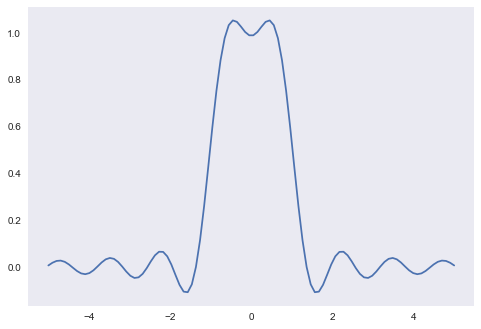

In [20]:
xs = linspace(-5,5,100) 
y = [f(x,5) for x in xs]
plt.plot(xs,y)
plt.grid()

Nope. That just smooths out the ugliness. What does it look like farther away?

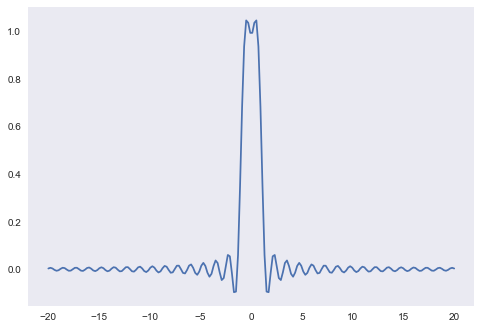

In [21]:
xs = linspace(-20,20,200) 
y = [f(x,5) for x in xs]
plt.plot(xs,y)
plt.grid()

So, at least the ringing looks like it's dying off. What if we change the upper limit of the integral?

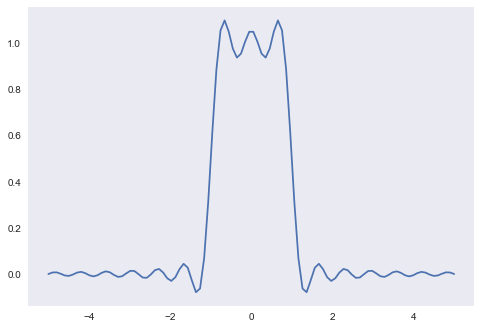

In [22]:
xs = linspace(-5,5,100) 
y = [f(x,10) for x in xs]
plt.plot(xs,y)
plt.grid()

That's looking better. Let's keep doing it.

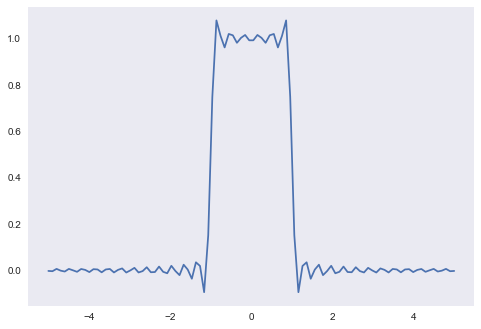

In [23]:
xs = linspace(-5,5,100) 
y = [f(x,20) for x in xs]
plt.plot(xs,y)
plt.grid()

/Users/mglerner/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/mglerner/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


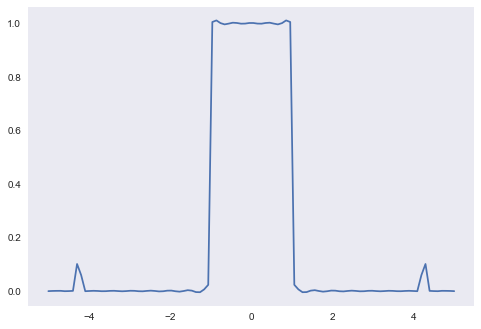

In [24]:
xs = linspace(-5,5,100) 
y = [f(x,200) for x in xs]
plt.plot(xs,y)
plt.grid()

Can we make sense of that? Well, remember that we evaluate `f` at a point by calculating

<pre><code>return integrate.quad(g, 0, toplim)[0]*2/pi</pre></code>

That is, `inner(alpha)` gets integrated from `0` to `toplim`. So essentially we're looking at Parseval's theorem here. If we don't have the full spectrum (i.e. all of the $\alpha$'s), we can't reproduce our function!

How close are we to reproducing the function entirely? Well, not as close as we might like. Remember, the intiutive argument was that we had to make things continuous and integrate over all values of $\alpha$ to "stretch the period out to infinity," so the ringing gets kind of ugly:

/Users/mglerner/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/Users/mglerner/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


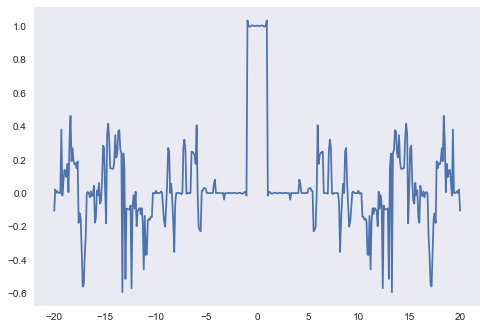

In [25]:
xs = linspace(-20,20,400) 
y = [f(x,200) for x in xs]
plt.plot(xs,y)
plt.grid()

/Users/mglerner/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/mglerner/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


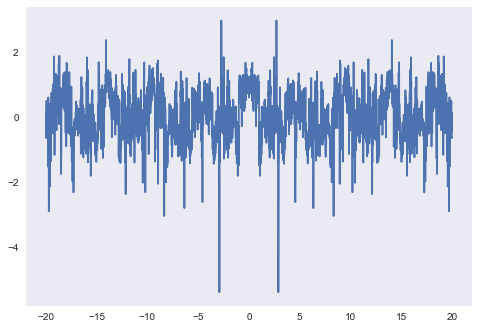

In [26]:
xs = linspace(-20,20,4000) 
y = [f(x,20000) for x in xs]
plt.plot(xs,y)
plt.grid()

So part of the story there is that numerical methods is fully deserving of its own course. Errors accumulate in ways you aren't expecting, and you don't always get better answers by doing the "obvious" thing. Let's be happy with

/Users/mglerner/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


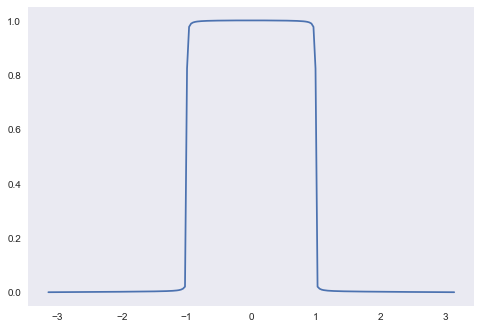

In [27]:
xs = linspace(-pi,pi,200) 
y = [f(x,200) for x in xs]
plt.plot(xs,y)
plt.grid()